In [2]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline 
#Importing all the required liberaries

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
#Creating a dummy data


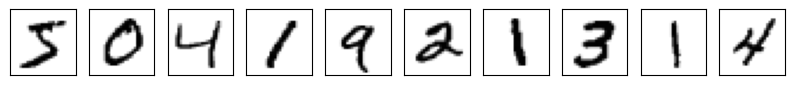

In [8]:
def plot(x, p, labels = False):
    plt.figure(figsize=(10,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    return
plot(x_train, None)
# Training Data without noise

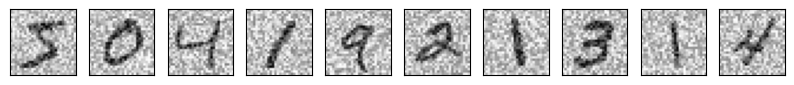

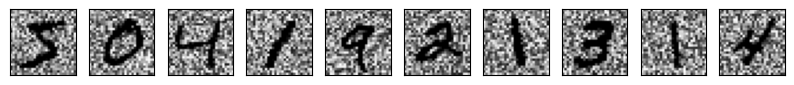

In [13]:
x_train_noisy = x_train + np.random.rand(60000, 784) * 0.9
x_test_noisy = x_test + np.random.rand(10000, 784) * 0.9
plot(x_train_noisy,None)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
plot(x_train_noisy,None)

#Adding the noise to the training data

In [14]:
#Building and training the Classifier
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
118/118 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.8855
Epoch 2/3
118/118 [==============================] - 0s 3ms/step - loss: 0.1487 - accuracy: 0.9566
Epoch 3/3
118/118 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9702


In [15]:
#Accuracy for the classifier
loss, acc = classifier.evaluate(x_test, y_test)
print(acc)

313/313 [==============================] - 0s 487us/step - loss: 0.0928 - accuracy: 0.9711
0.9710999727249146


In [16]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)
print(acc)

313/313 [==============================] - 0s 456us/step - loss: 9.1793 - accuracy: 0.1913
0.19130000472068787


In [17]:
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [18]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100, batch_size=512,
    validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print('Training is complete!')

0.257 _ 0.219 _ 0.193 _ 0.178 _ 0.166 _ 0.157 _ 0.150 _ 0.143 _ 0.138 _ 0.134 _ 0.130 _ 0.127 _ 0.125 _ 0.123 _ 0.121 _ 0.119 _ 0.117 _ 0.115 _ 0.114 _ 0.113 _ 0.112 _ 0.111 _ 0.110 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.104 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _ 0.103 _  _ 
Training is complete!


In [24]:
predx = autoencoder.predict(x_test_noisy)


313/313 [==============================] - 0s 386us/step


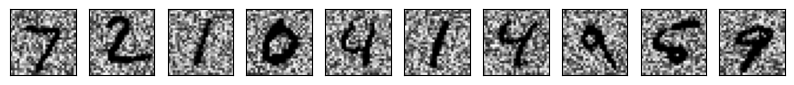

In [25]:
plot(x_test_noisy, None)


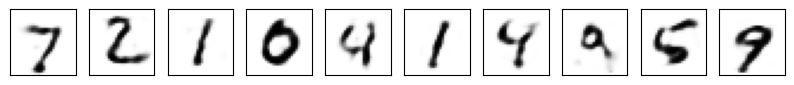

In [26]:
plot(predx,None)

In [33]:
loss, acc = classifier.evaluate(predx,y_test)
print(acc)
#Accuracy for the predicted model

313/313 [==============================] - 0s 482us/step - loss: 0.1494 - accuracy: 0.9521
0.9520999789237976


In [34]:
noisy_image = Input(shape=(784,))
x = autoencoder(noisy_image)
y = classifier(x)

denoise_and_classify = Model(noisy_image, y)

In [35]:
p = denoise_and_classify.predict(x_test_noisy)

313/313 [==============================] - 0s 571us/step


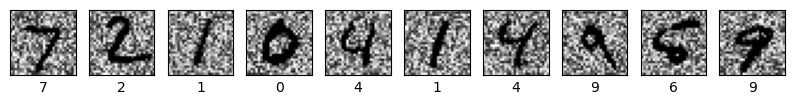

In [36]:
plot(x_test_noisy, p, True)

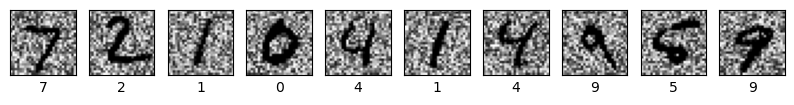

In [37]:
plot(x_test_noisy, to_categorical(y_test), True)